In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Load your dataset into a pandas DataFrame
df = pd.read_csv('w3regr.csv')

# Split the DataFrame into train and test sets
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)

In [3]:
# Extract the features and labels from the train and test sets
X_train = train_df.drop(columns=['y'])
y_train = train_df['y']
X_test = test_df.drop(columns=['y'])
y_test = test_df['y']


In [4]:
# Create the k-NN regressor with k=3
k = 3
knn = KNeighborsRegressor(n_neighbors=k)

In [5]:
# Fit the regressor to the training data
knn.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [6]:
# Calculate the sum of squared error on the training and test sets
train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

print('Training loss: {:.4f}'.format(train_loss))
print('Test loss: {:.4f}'.format(test_loss))

Training loss: 111.1151
Test loss: 552.8313


/Users/alexviller/miniconda3/envs/4702-tutoring/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


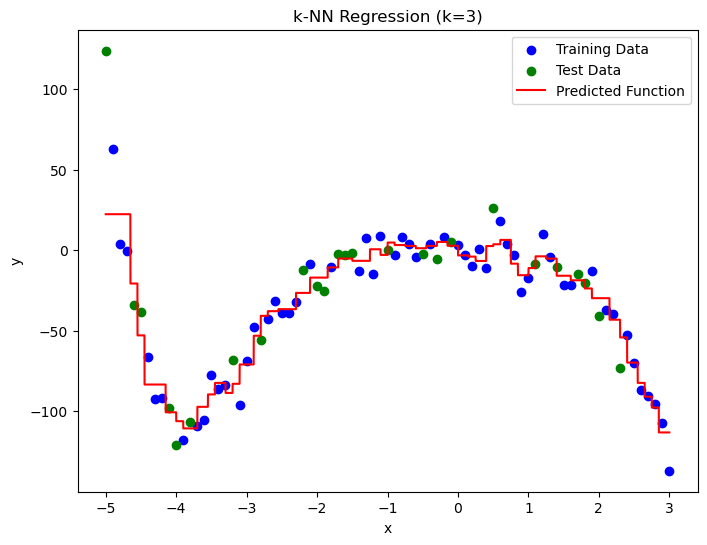

In [7]:
X_new = np.linspace((df.iloc[:, 0].min()), (df.iloc[:, 0].max()), 100000).reshape(-1, 1)
y_pred = knn.predict(X_new)

# Plot the training and/or test data together with the predicted function
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_new, y_pred, color='red', label='Predicted Function')
plt.title(f'k-NN Regression (k={k})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [8]:
# Train decision tree regression model
maxDepth = 5
reg = DecisionTreeRegressor(random_state=42, max_depth=maxDepth)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [9]:
# Predict on training and test sets
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [10]:
# predict across array
y_plot = reg.predict(X_new)

/Users/alexviller/miniconda3/envs/4702-tutoring/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [11]:
# Compute training and test loss
train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

print("Training loss: {:.4f}".format(train_loss))
print("Test loss: {:.4f}".format(test_loss))

Training loss: 80.1054
Test loss: 431.8577


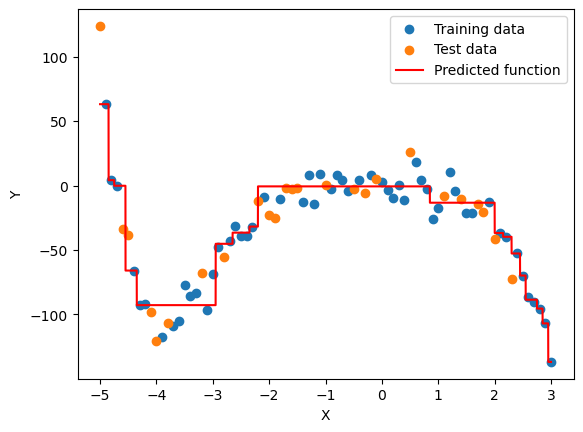

In [12]:
# Plot the data and the predicted function
plt.scatter(X_train, y_train, label="Training data")
plt.scatter(X_test, y_test, label="Test data")
plt.plot(X_new, y_plot, color="red", label="Predicted function")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()